# Importing The Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

# Splitting the dataset into the Training set and test set

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25,random_state=0)

# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the Suppot Vector Machine model on the Training set (rbf)

In [48]:
from sklearn.svm import SVC
classifier = SVC(kernel= 'rbf', random_state =0 )
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [44]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', C = 1, gamma = 1)
classifier.fit(x_train, y_train)

SVC(C=1, gamma=1)

# Predicting the Test set results

In [45]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

# Making the Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


# Visualising the training set result

C:\Users\EMBEDD~1\AppData\Local\Temp/ipykernel_10212/940853341.py:5: UserWarning: The following kwargs were not used by contour: 'lpha'
  plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


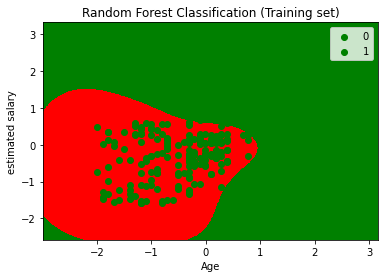

In [47]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_train, y_train
x1, x2= np.meshgrid(np.arange(start= x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), 
                    np.arange(start= x_set[:, 1].min() - 1, stop= x_set[:, 1].max()+1, step=0.01)) 
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             lpha=0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max()) 
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(("red", "green"))(1), label= j)
plt.title('Random Forest Classification (Training set)') 
plt.xlabel("Age")

plt.ylabel("estimated salary")

plt.legend() 
plt.show()

# Training the Suppot Vector Machine model on the Training set (sigmoid)

In [54]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state =0)
classifier.fit(x_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [55]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[54 14]
 [12 20]]


C:\Users\EMBEDD~1\AppData\Local\Temp/ipykernel_10212/940853341.py:5: UserWarning: The following kwargs were not used by contour: 'lpha'
  plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


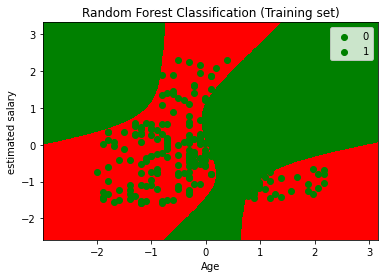

In [57]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_train, y_train
x1, x2= np.meshgrid(np.arange(start= x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), 
                    np.arange(start= x_set[:, 1].min() - 1, stop= x_set[:, 1].max()+1, step=0.01)) 
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             lpha=0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max()) 
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(("red", "green"))(1), label= j)
plt.title('Random Forest Classification (Training set)') 
plt.xlabel("Age")

plt.ylabel("estimated salary")

plt.legend() 
plt.show()

# Training the Suppot Vector Machine model on the Training set (poly)

In [59]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state =0)
classifier.fit(x_train, y_train)

SVC(kernel='poly', random_state=0)

In [60]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[67  1]
 [13 19]]


C:\Users\EMBEDD~1\AppData\Local\Temp/ipykernel_10212/940853341.py:5: UserWarning: The following kwargs were not used by contour: 'lpha'
  plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


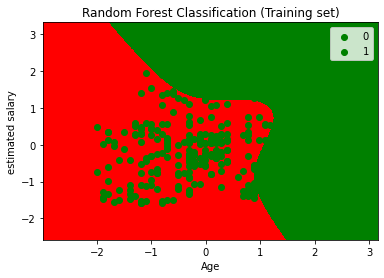

In [62]:
from matplotlib.colors import ListedColormap 
x_set, y_set = x_train, y_train
x1, x2= np.meshgrid(np.arange(start= x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), 
                    np.arange(start= x_set[:, 1].min() - 1, stop= x_set[:, 1].max()+1, step=0.01)) 
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             lpha=0.75, cmap = ListedColormap(("red", "green")))
plt.xlim(x1.min(), x1.max()) 
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(("red", "green"))(1), label= j)
plt.title('Random Forest Classification (Training set)') 
plt.xlabel("Age")

plt.ylabel("estimated salary")

plt.legend() 
plt.show()

In [65]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'gaussian', random_state =0)
classifier.fit(x_train, y_train)

ValueError: 'gaussian' is not in list